<a href="https://colab.research.google.com/github/harshgehlot-code/Loan-approval-model/blob/main/Loan_approval_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN APPROVAL PREDICTION #

Life cycle of Machine learning Project

    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model


The variables can be categorized as independent and dependent based on their roles in predicting the target outcome:

🎯 Dependent Variable (Target):

    Loan_Status: This is the target variable you want to predict — whether the loan is approved (Y) or not (N).

📊 Independent Variables (Features):

These are the input variables used to predict the loan status:

    Loan_ID (Note: This is a unique identifier and usually dropped in modeling)

    Gender

    Married

    Dependents

    Education

    Self_Employed

    ApplicantIncome

    CoapplicantIncome

    LoanAmount

    Loan_Amount_Term

    Credit_History

    Property_Area

1. PROBLEM STATEMENT :

Determining loan eligibility is a crucial task for banks, requiring the evaluation of multiple factors such as **Marital Status, Education, Applicant Income, and Credit History**. Manual assessment is time-consuming and prone to errors. This project aims to develop a **Machine Learning-based Loan Approval Prediction System** to automate and enhance the accuracy of loan approval decisions, reducing processing time and financial risk.


2. DATA COLLECTION :

The data consist of 13 columns and 1196 rows


2.1 Import data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import CSV data as pandas dataframes

In [ ]:
from google.colab import files

    # Replace with the raw CSV file URL obtained from Google Drive
url = "https://drive.google.com/uc?id=1-KGmzSGLY4jlfIGHWkn4eSt-kjD4pShv&export=download"

df = pd.read_csv(url)


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(1196, 13)

#2.1 Dataset Collection:#


The Dataset Contains 13 features


Let's discuss how each feature in the dataset could potentially impact the target feature, which is "Loan_Status" (indicating whether the loan was approved or not).
Loan_ID: A unique identifier for each loan application. It doesn't contribute to the decision-making process but can be useful for record-keeping.


Gender:
Lending institutions might consider gender as a factor in loan approval, depending on historical data or institutional policies. For instance, if there's evidence of gender-based discrimination, it could affect loan approval.


Married:
Married individuals may be perceived as more financially stable and responsible.
Lenders might be more inclined to approve loans for married applicants.


Dependents:
The number of dependents could influence loan approval, as more dependents might mean higher financial responsibilities. Lenders may assess the applicant's ability to repay the loan considering their family size.


Education:
The level of education might be a proxy for the applicant's earning potential and financial stability. Graduates may be perceived as having better job prospects and, consequently, higher repayment capabilities.


Self_Employed:
Self-employed individuals may face different income patterns compared to salaried individuals. Lenders might scrutinize the stability of self-employed applicants' income sources.

ApplicantIncome: Higher income generally indicates a better ability to repay a loan. However, extremely high or low incomes might be red flags. Lenders may set income thresholds for loan approval.

ApplicantIncome: Higher income generally indicates a better ability to repay a loan. However, extremely high or low incomes might be red flags. Lenders may set income thresholds for loan approval.


CoapplicantIncome: The income of the coapplicant can supplement the household income, affecting the overall repayment capacity. A higher coapplicant income may positively influence loan approval.


LoanAmount: The amount of the loan applied for is crucial. Lenders will assess whether the requested loan amount aligns with the applicant's income and financial situation.


Loan_Amount_Term: The term of the loan affects monthly repayment amounts. Shorter terms might indicate a quicker repayment ability, while longer terms might be associated with higher overall interest payments.


Credit_History: This is likely one of the most critical factors. A good credit history (1.0) is generally associated with a higher likelihood of loan approval. Lenders heavily rely on credit history to assess risk.


Property_Area: The location of the property can influence loan approval. Urban areas might have different risk profiles than rural areas, and lenders may have specific criteria for different regions.


CoapplicantIncome: The income of the coapplicant can supplement the household income, affecting the overall repayment capacity. A higher coapplicant income may positively influence loan approval.


LoanAmount: The amount of the loan applied for is crucial. Lenders will assess whether the requested loan amount aligns with the applicant's income and financial situation.


Loan_Amount_Term: The term of the loan affects monthly repayment amounts. Shorter terms might indicate a quicker repayment ability, while longer terms might be associated with higher overall interest payments.


Credit_History: This is likely one of the most critical factors. A good credit history (1.0) is generally associated with a higher likelihood of loan approval. Lenders heavily rely on credit history to assess risk.


Property_Area: The location of the property can influence loan approval. Urban areas might have different risk profiles than rural areas, and lenders may have specific criteria for different regions.




#3. Data Checks to perform#

Data cleaning:-

Clean the data to handle missing values, outliers, and inconsistencies. This step is crucial for the model's accuracy and generalization. We may need to impute missing values, standardize or normalize features, and deal with any data anomalies.

**3.1 Check missing values**

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,24
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,42
Loan_Amount_Term,28


Treatment of null values

In [ ]:
df.dropna(inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1192,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1193,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
1194,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,824
Female,186


There is no missing values

Check duplicates

In [ ]:
df.duplicated().sum()

np.int64(505)

remove duplicates

In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)
print(df)

(505, 13)
      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
5    LP001011    Male     Yes         2.0      Graduate           Yes   
..        ...     ...     ...         ...           ...           ...   
603  LP002978  Female      No         0.0      Graduate            No   
604  LP002979    Male     Yes         3.0      Graduate            No   
605  LP002983    Male     Yes         1.0      Graduate            No   
606  LP002984    Male     Yes         2.0      Graduate            No   
607  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0 

**3.3 Check Datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            505 non-null    object 
 1   Gender             505 non-null    object 
 2   Married            505 non-null    object 
 3   Dependents         505 non-null    float64
 4   Education          505 non-null    object 
 5   Self_Employed      505 non-null    object 
 6   ApplicantIncome    505 non-null    int64  
 7   CoapplicantIncome  505 non-null    float64
 8   LoanAmount         505 non-null    float64
 9   Loan_Amount_Term   505 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      505 non-null    object 
 12  Loan_Status        505 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 55.2+ KB


In [ ]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Married' variable:  ",end=" ")
print(df['Married'].unique())

print("Categories in 'Education' variable:  ",end=" ")
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable:  ",end=" ")
print(df['Self_Employed'].unique())


print("Categories in 'Loan_Status' variable:  ",end=" ")
print(df['Loan_Status'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'Married' variable:   ['Yes' 'No']
Categories in 'Education' variable:   ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:   ['No' 'Yes']
Categories in 'Loan_Status' variable:   ['N' 'Y']


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Semiurban', 'Property_Area_Urban']

We have 5 categorical features : ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']


We have 6 numerical features : ['Dependents', 'ApplicantIncoWe have 6 numerical features : ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 6 categorical features : ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,False,False
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,False,True
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,False,True
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,False,True
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,False,True


#Encoding#

In [ ]:
# Example: 'Male' → 1, 'Female' → 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [ ]:
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype(int)
df['Property_Area_Urban'] = df['Property_Area_Urban'].astype(int)


In [ ]:
print(df.dtypes[['Property_Area_Semiurban', 'Property_Area_Urban']])
print(df[['Property_Area_Semiurban', 'Property_Area_Urban']].head())


Property_Area_Semiurban    int64
Property_Area_Urban        int64
dtype: object
   Property_Area_Semiurban  Property_Area_Urban
1                        0                    0
2                        0                    1
3                        0                    1
4                        0                    1
5                        0                    1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   505 non-null    int64  
 1   Married                  505 non-null    int64  
 2   Dependents               505 non-null    float64
 3   Education                505 non-null    int64  
 4   Self_Employed            505 non-null    int64  
 5   ApplicantIncome          505 non-null    int64  
 6   CoapplicantIncome        505 non-null    float64
 7   LoanAmount               505 non-null    float64
 8   Loan_Amount_Term         505 non-null    float64
 9   Credit_History           505 non-null    float64
 10  Loan_Status              505 non-null    int64  
 11  Property_Area_Semiurban  505 non-null    int64  
 12  Property_Area_Urban      505 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 55.2 KB


#4. Exploratory Data Analysis (Visualization)#

Visualize all the unique values in columns using barplot.

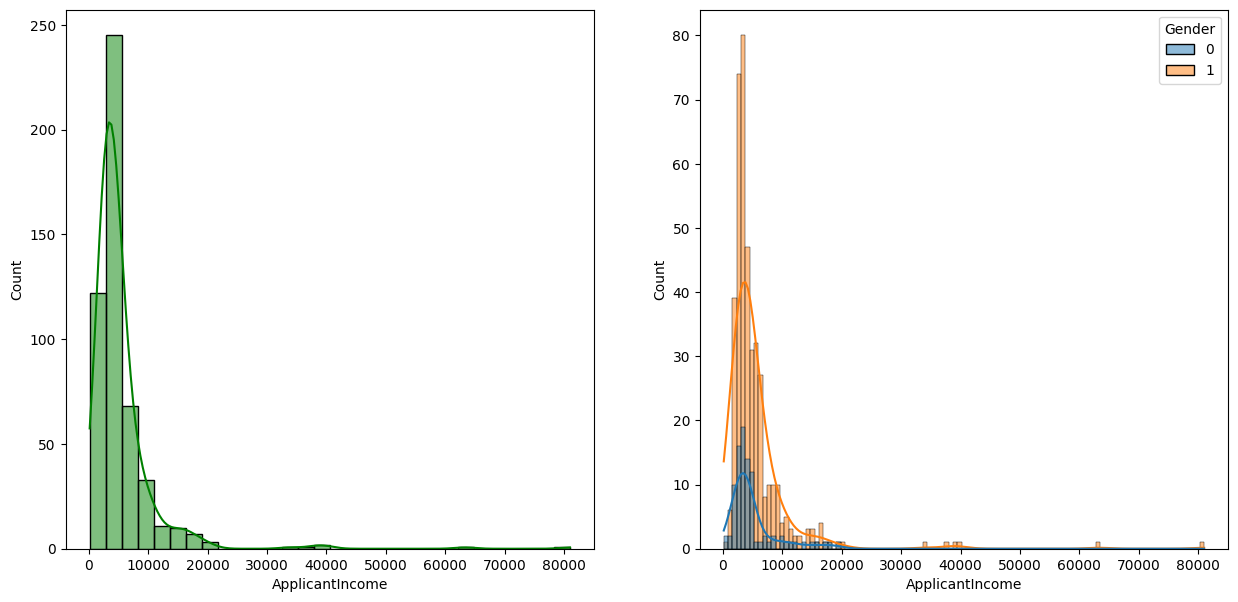

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='ApplicantIncome',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='ApplicantIncome',kde=True,hue='Gender')
plt.show()

📊 Explanation:

    Left Plot: Shows the overall distribution of ApplicantIncome. It is right-skewed, meaning most applicants have lower incomes, but a few earn significantly more.

    Right Plot: Same data, but split by Gender (likely 0 = Female, 1 = Male). Both genders follow a similar income distribution, but males (1) appear slightly more represented in higher income ranges.

✅ Overall:

    Applicant incomes are mostly concentrated below 20,000.

    There's no drastic difference in income distribution between genders, though males might have a slightly higher income on average.

Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

<Figure size 1800x3600 with 0 Axes>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   505 non-null    int64  
 1   Married                  505 non-null    int64  
 2   Dependents               505 non-null    float64
 3   Education                505 non-null    int64  
 4   Self_Employed            505 non-null    int64  
 5   ApplicantIncome          505 non-null    int64  
 6   CoapplicantIncome        505 non-null    float64
 7   LoanAmount               505 non-null    float64
 8   Loan_Amount_Term         505 non-null    float64
 9   Credit_History           505 non-null    float64
 10  Loan_Status              505 non-null    int64  
 11  Property_Area_Semiurban  505 non-null    int64  
 12  Property_Area_Urban      505 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 55.2 KB


<Axes: >

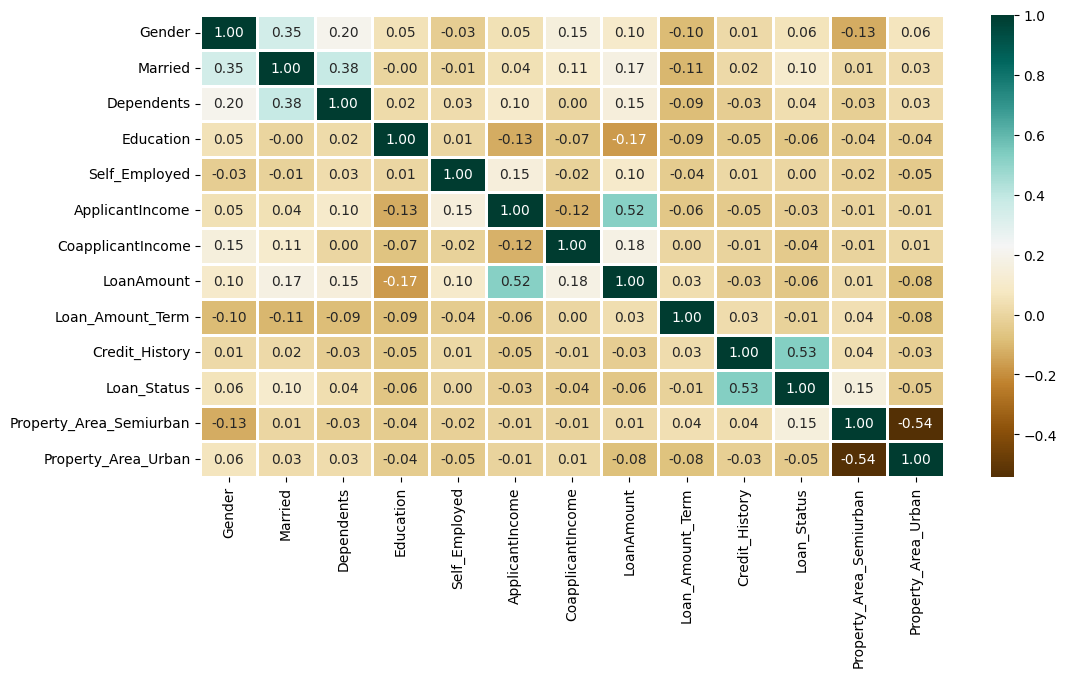

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

This is a correlation heatmap showing the relationships between numeric features in your dataset. The values range from -1 to 1:

    1 means a perfect positive correlation (both increase together).

    -1 means a perfect negative correlation (one increases, the other decreases).

    0 means no correlation.

📌 Key Observations:

    Credit_History has a moderate positive correlation (0.53) with Loan_Status, suggesting it's an important feature for loan approval.

    ApplicantIncome and LoanAmount are moderately correlated (0.52), which makes sense—higher income often means a higher loan amount.

    Property_Area_Semiurban has a negative correlation (-0.54) with Property_Area_Urban, which is expected as they're dummy variables from the same category.

✅ Overall:

    Credit_History is the most influential feature for predicting loan approval.

    Other features show low to moderate correlation, indicating that a combination of factors—not just one—determines loan status.

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status

 Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

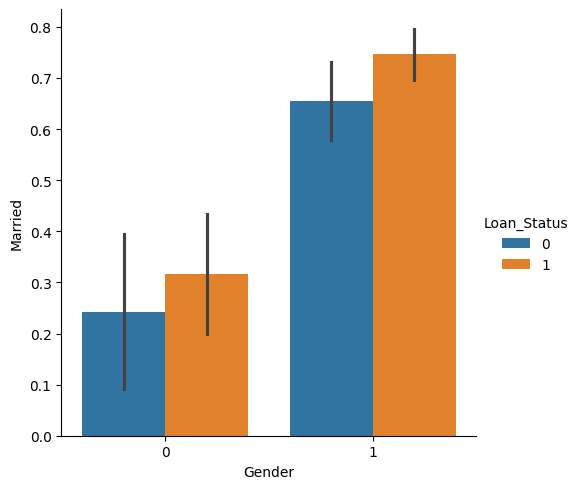

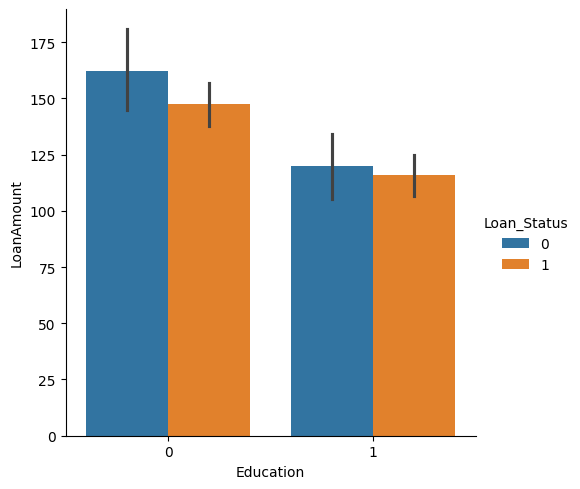

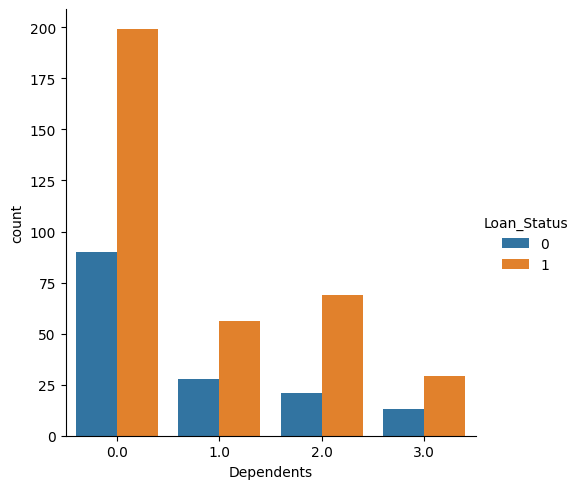

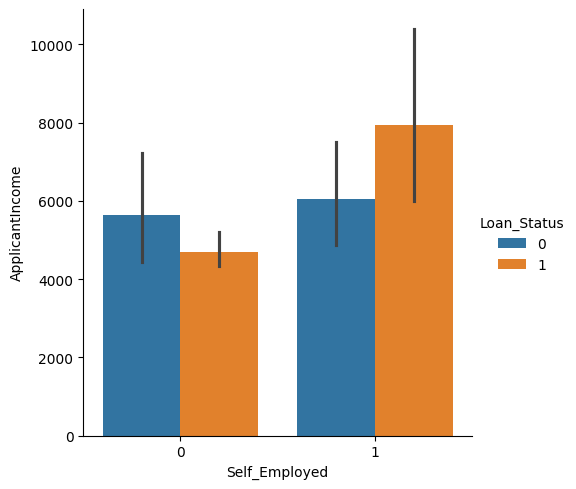

In [ ]:
# 1. Gender vs Married, grouped by Loan Status
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=df)

# 2. Education vs average LoanAmount, grouped by Loan_Status
sns.catplot(x="Education", y="LoanAmount", hue="Loan_Status", kind="bar", data=df)

# 3. Dependents vs Loan_Status (count of approvals)
sns.catplot(x="Dependents", hue="Loan_Status", kind="count", data=df)

# 4. Self_Employed vs average ApplicantIncome
sns.catplot(x="Self_Employed", y="ApplicantIncome", hue="Loan_Status", kind="bar", data=df)


🔹 1. Gender vs Married (with Loan_Status hue)

Interpretation:

    Shows distribution of marital status across genders and loan approval.

    Majority of approved loans (Loan_Status = 1) belong to males who are married.

    Female applicants are fewer, and their approval rate is slightly lower in comparison.

🔹 2. Dependents vs Loan_Status

Interpretation:

    Applicants with 0 or 1 dependent have higher approval rates.

    As the number of dependents increases, loan approvals slightly decrease.

    Applicants with 3+ dependents are fewer and have lower approval.

🔹 3. Self_Employed vs ApplicantIncome (with Loan_Status)

Interpretation:

    Self-employed applicants have higher average incomes, but variability is also greater.

    Both self-employed and salaried people get loans approved, but non self-employed have more consistent approval rates.

🔹 4. Gender vs Married (Duplicate graph likely)

Looks similar to the first — same insights.

🔹 5. Education vs Loan_Status

Interpretation:

    Both graduates and non-graduates apply for loans, but graduates are more.

    Approval rates are slightly better for graduates, though the difference isn’t huge.

🔹 6. Dependents vs Loan_Status (Repeated)

Same as above. Possibly a repeated chart.


#✅ Overall Result:#

    Married male graduates with fewer dependents are more likely to get loans approved.

    Being self-employed doesn't drastically reduce approval, but salaried applicants show more consistency.

    Features like Gender, Marital Status, Dependents, and Education help identify trends in loan approval outcomes.

Credit_History has a high impact on Loan_Status


In [ ]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

df.isna().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
